# Customer Churn EDA (App Data)

This notebook consolidates and structures the exploratory analysis from the original
`01_data_exploration` variants. It focuses on data quality, target distribution, key
behavioral signals, and time-based patterns relevant to churn (target = `enrolled`).

In [2]:
import sys
from pathlib import Path

# Add project root to Python path
ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option("display.max_columns", 100)

NOTEBOOK_DIR = Path.cwd()
BASE_DIR = NOTEBOOK_DIR.parent
DATA_DIR = BASE_DIR / "Dataset"

APPDATA_PATH = DATA_DIR / "appdata10.csv"
TOP_SCREENS_PATH = DATA_DIR / "top_screens.csv"

APPDATA_PATH, TOP_SCREENS_PATH

from src.preprocessing import create_behavioral_features


## 1. Load data

In [3]:
df = pd.read_csv(APPDATA_PATH)

print("Shape:", df.shape)
df.head()

Shape: (50000, 12)


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## 2. Data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


## 3. Missing values

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

enrolled_date    18926
dtype: int64

## 4. Target distribution

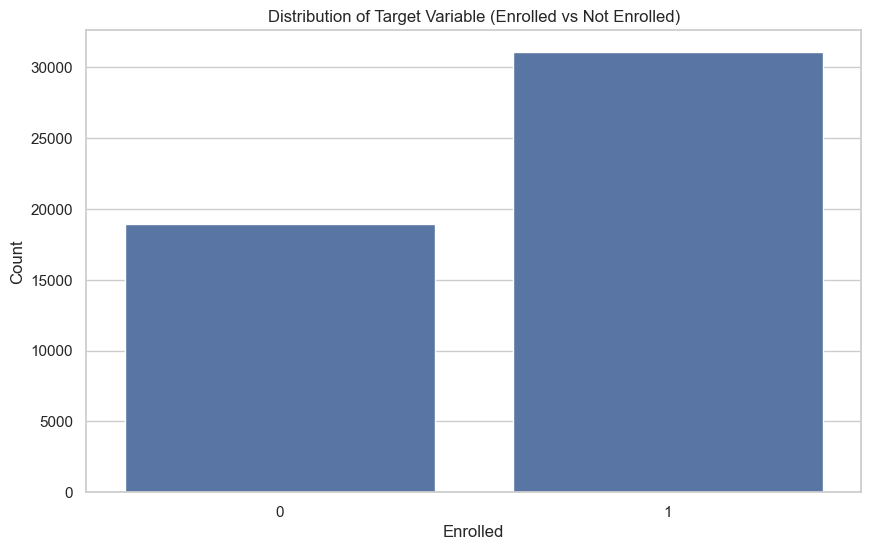

enrolled
1    0.62148
0    0.37852
Name: proportion, dtype: float64

In [7]:
target = df["enrolled"]

fig, ax = plt.subplots()
sns.countplot(x=target, ax=ax)
ax.set_title("Distribution of Target Variable (Enrolled vs Not Enrolled)")
ax.set_xlabel("Enrolled")
ax.set_ylabel("Count")
plt.show()

target.value_counts(normalize=True)

## 5. Numerical feature distributions

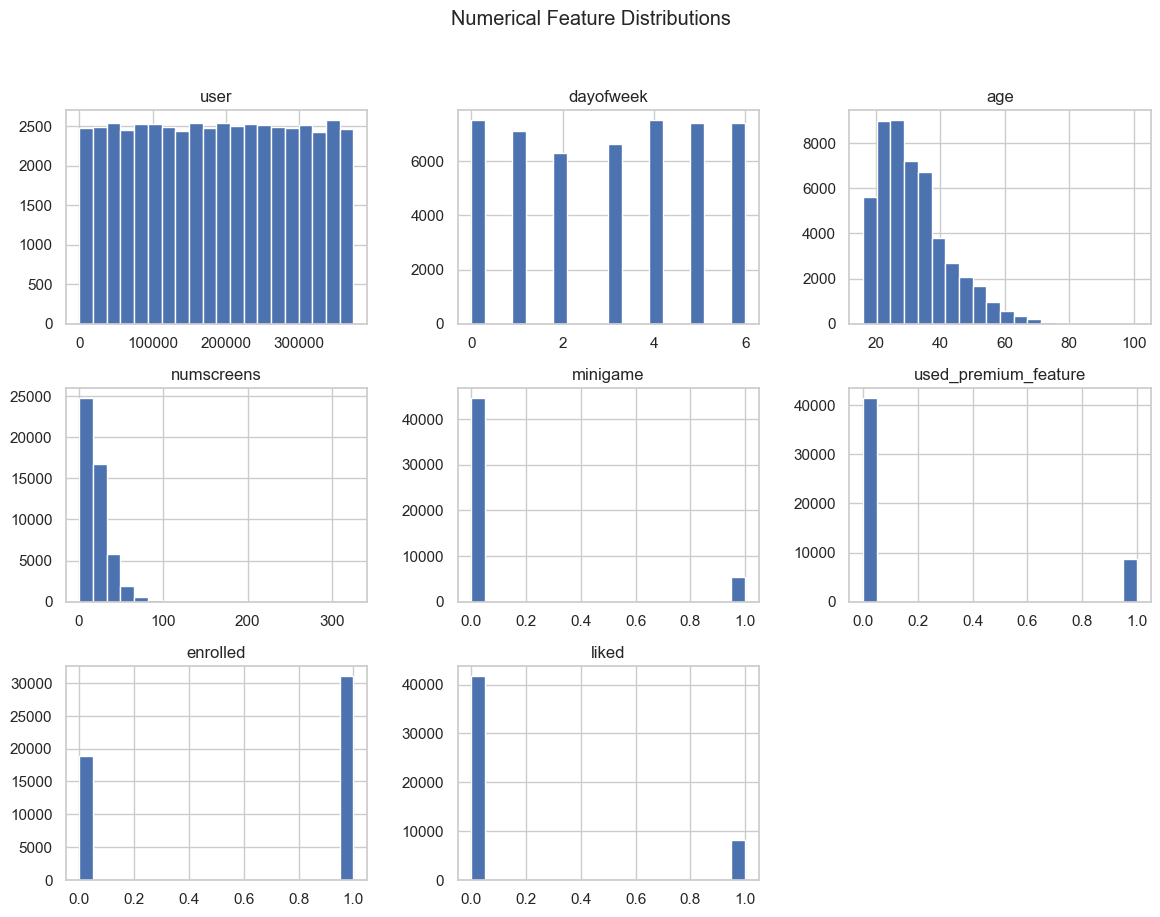

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

## 6. Correlation heatmap

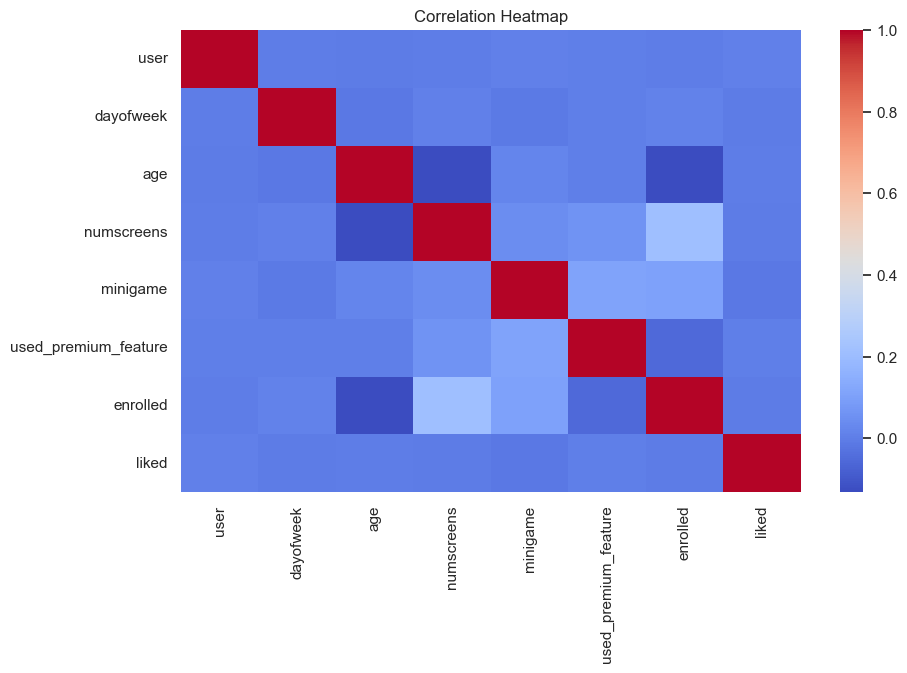

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 7. Age vs Enrollment

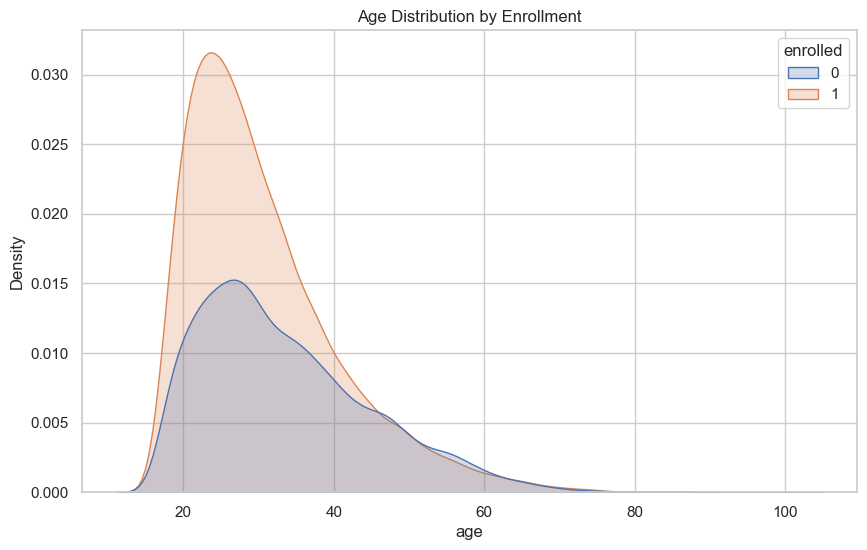

In [10]:
sns.kdeplot(data=df, x="age", hue="enrolled", fill=True)
plt.title("Age Distribution by Enrollment")
plt.show()

## 8. Enrollment rate by hour of first use

/var/folders/x0/wgly_nns1fv29xpzlyzyxnd80000gn/T/ipykernel_24387/1374848074.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_int"] = pd.to_datetime(df["hour"].astype(str).str.strip(), errors="coerce").dt.hour


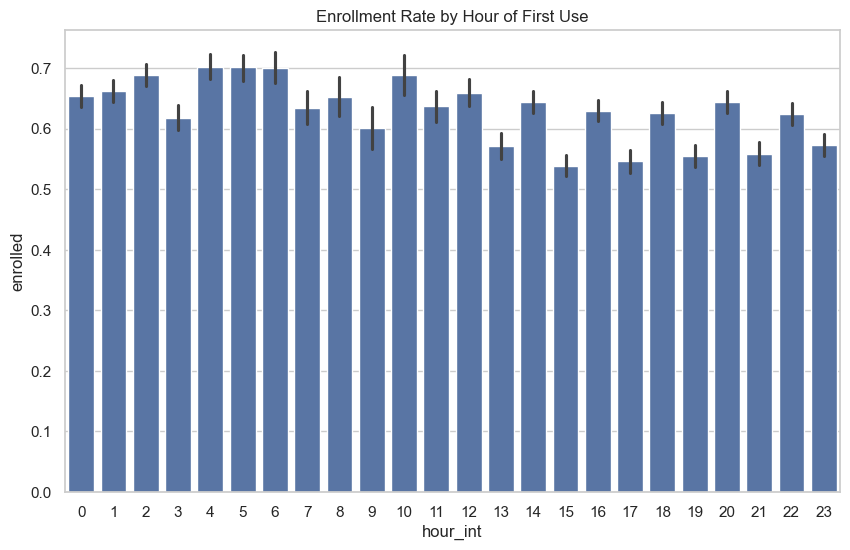

In [11]:
df["hour_int"] = pd.to_datetime(df["hour"].astype(str).str.strip(), errors="coerce").dt.hour

sns.barplot(x="hour_int", y="enrolled", data=df)
plt.title("Enrollment Rate by Hour of First Use")
plt.show()

## 9. Outlier scan (numerical features)

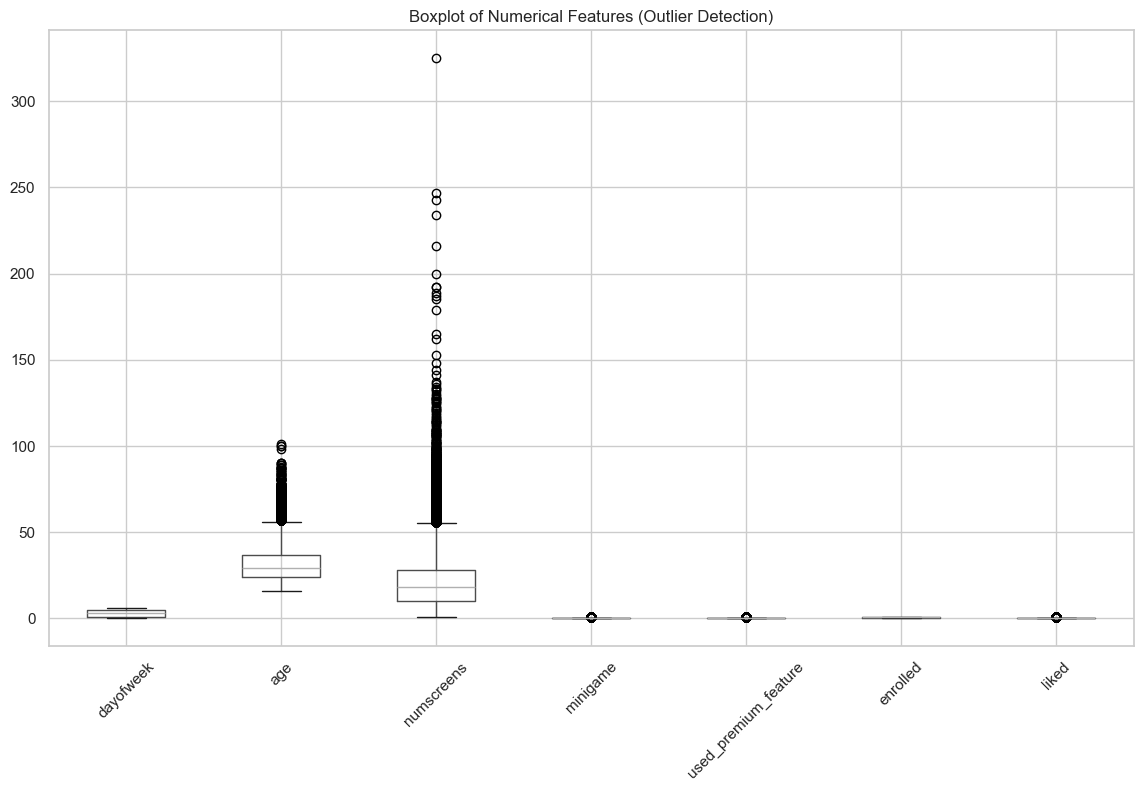

In [12]:
num_cols_box = [col for col in num_cols if col != "user"]

plt.figure(figsize=(14, 8))
df[num_cols_box].boxplot()
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

## 10. Behaviour vs Enrollment

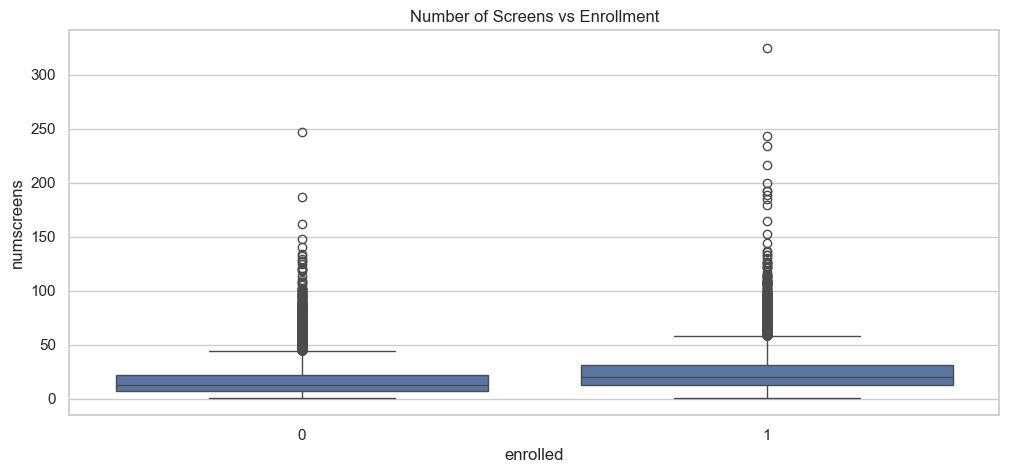

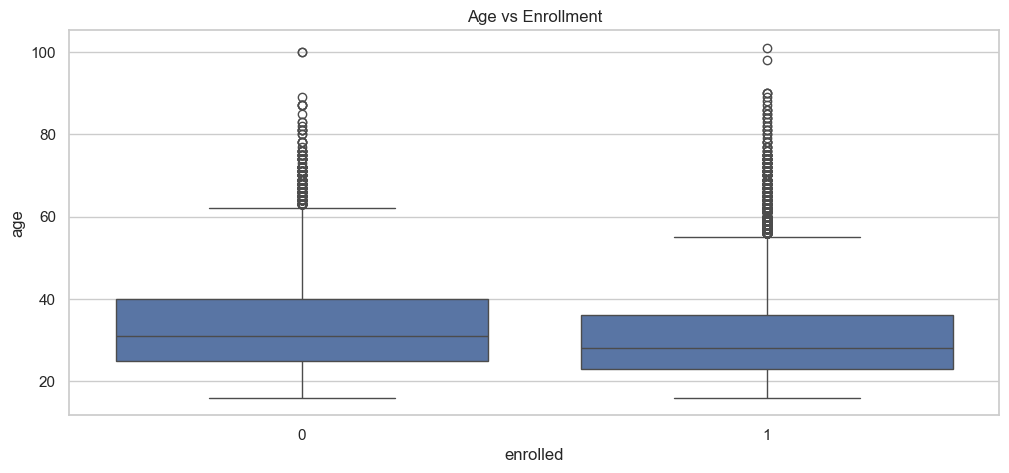

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="enrolled", y="numscreens", data=df)
plt.title("Number of Screens vs Enrollment")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="enrolled", y="age", data=df)
plt.title("Age vs Enrollment")
plt.show()

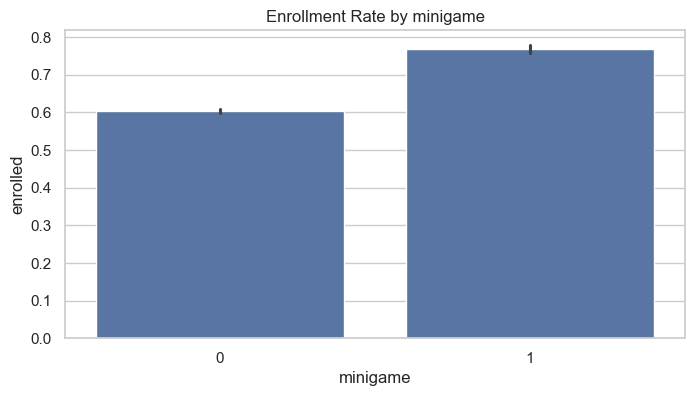

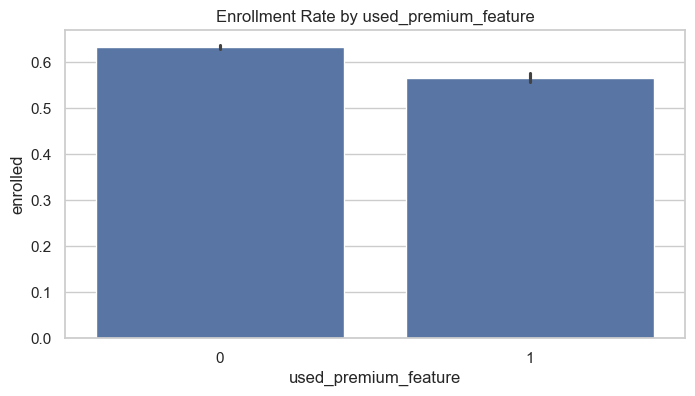

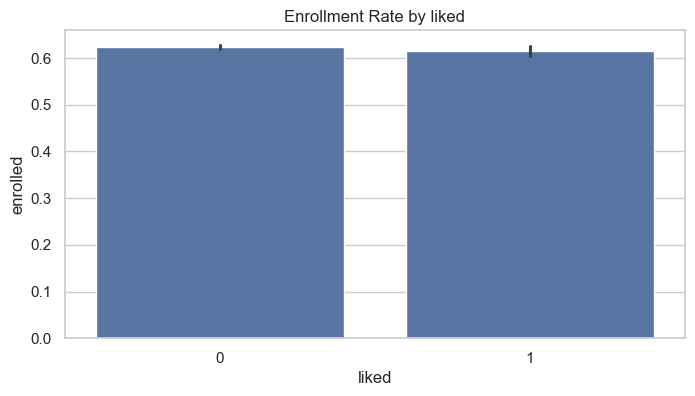

In [14]:
behaviour_cols = ["minigame", "used_premium_feature", "liked"]

for col in behaviour_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y="enrolled", data=df)
    plt.title(f"Enrollment Rate by {col}")
    plt.show()

## 11. Enrollment rate by day of week

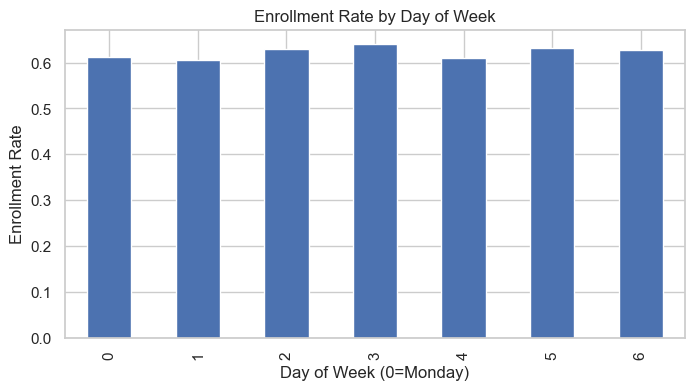

In [15]:
df.groupby("dayofweek")["enrolled"].mean().plot(kind="bar", figsize=(8, 4))
plt.title("Enrollment Rate by Day of Week")
plt.ylabel("Enrollment Rate")
plt.xlabel("Day of Week (0=Monday)")
plt.show()

## 12. Screens viewed vs Enrollment

/var/folders/x0/wgly_nns1fv29xpzlyzyxnd80000gn/T/ipykernel_24387/2502894691.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("screens_bin")["enrolled"].mean().plot(kind="bar", figsize=(10, 5))


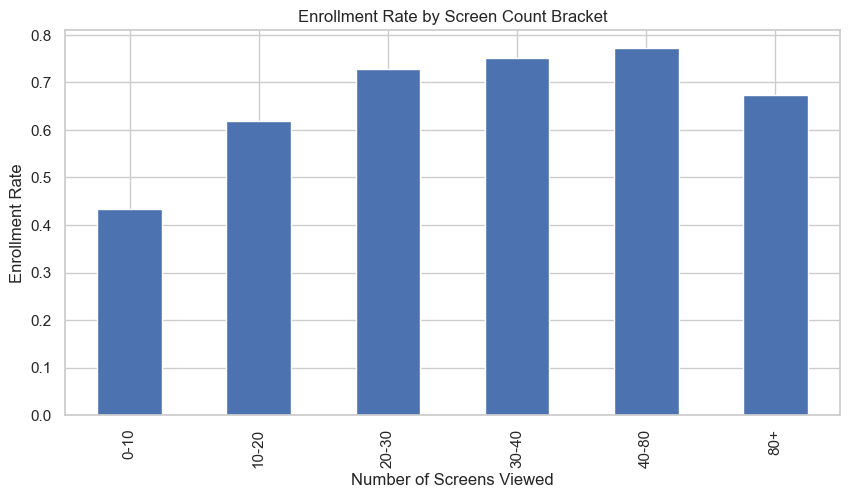

In [16]:
df["screens_bin"] = pd.cut(
    df["numscreens"],
    bins=[0, 10, 20, 30, 40, 80, 200],
    labels=["0-10", "10-20", "20-30", "30-40", "40-80", "80+"],
)

df.groupby("screens_bin")["enrolled"].mean().plot(kind="bar", figsize=(10, 5))
plt.title("Enrollment Rate by Screen Count Bracket")
plt.ylabel("Enrollment Rate")
plt.xlabel("Number of Screens Viewed")
plt.show()

## 13. Behavioural summary

In [17]:
for col in behaviour_cols:
    rate = df[col].mean() * 100
    print(f"{col}: {rate:.2f}% of users engaged with this feature.")

for col in behaviour_cols:
    rate = df[df[col] == 1]["enrolled"].mean() * 100
    print(f"Enrollment rate for users who did {col}: {rate:.2f}%")

minigame: 10.78% of users engaged with this feature.
used_premium_feature: 17.20% of users engaged with this feature.
liked: 16.50% of users engaged with this feature.
Enrollment rate for users who did minigame: 76.79%
Enrollment rate for users who did used_premium_feature: 56.54%
Enrollment rate for users who did liked: 61.38%


## 14. Pairplot (sampled)

Pairplots are expensive on full data, so we sample for visibility.


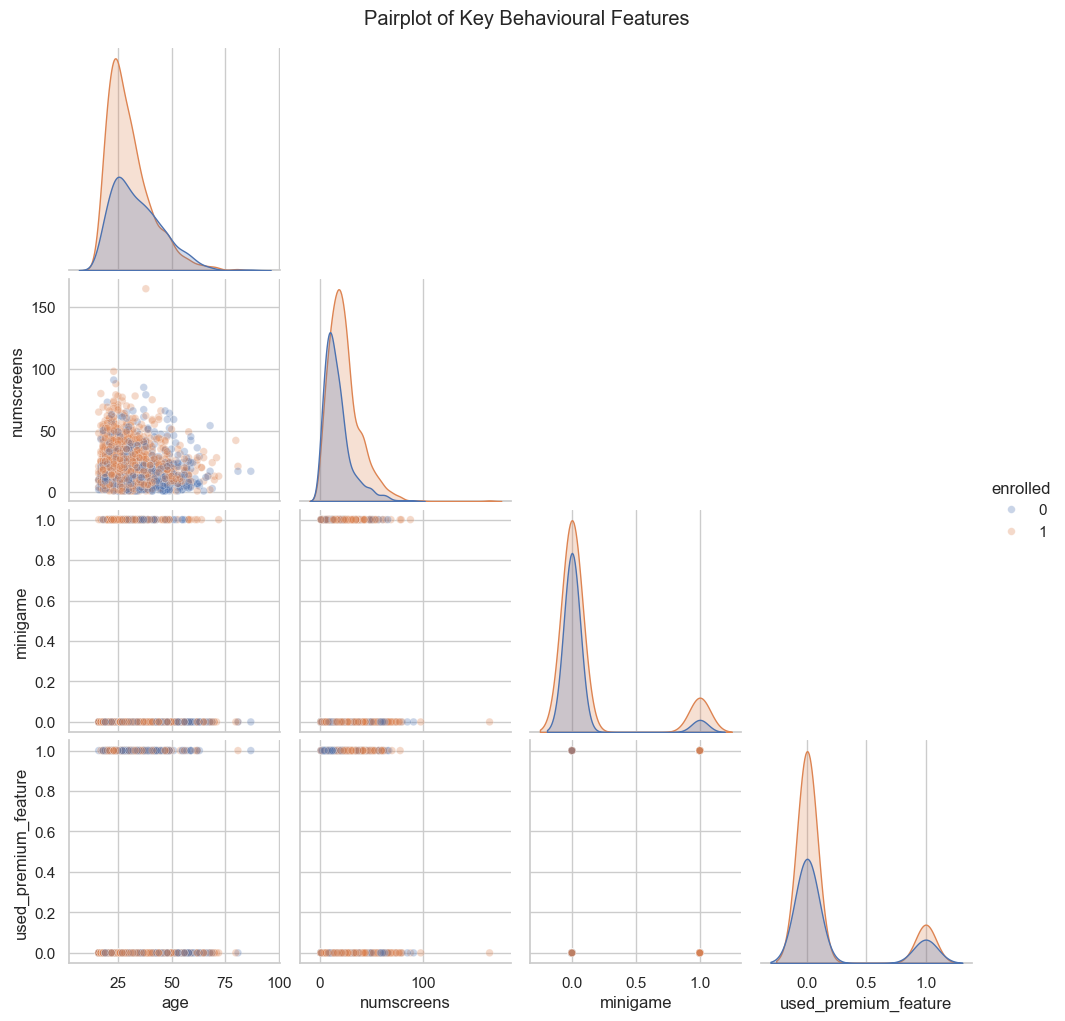

In [18]:
sample_df = df[["age", "numscreens", "minigame", "used_premium_feature", "enrolled"]].sample(
    n=min(2000, len(df)),
    random_state=42,
)

sns.pairplot(
    sample_df,
    hue="enrolled",
    corner=True,
    plot_kws={"alpha": 0.3, "s": 30},
)
plt.suptitle("Pairplot of Key Behavioural Features", y=1.02)
plt.show()

## 15. Time to enroll (if available)

This uses `first_open` and `enrolled_date` to inspect enrollment lag.


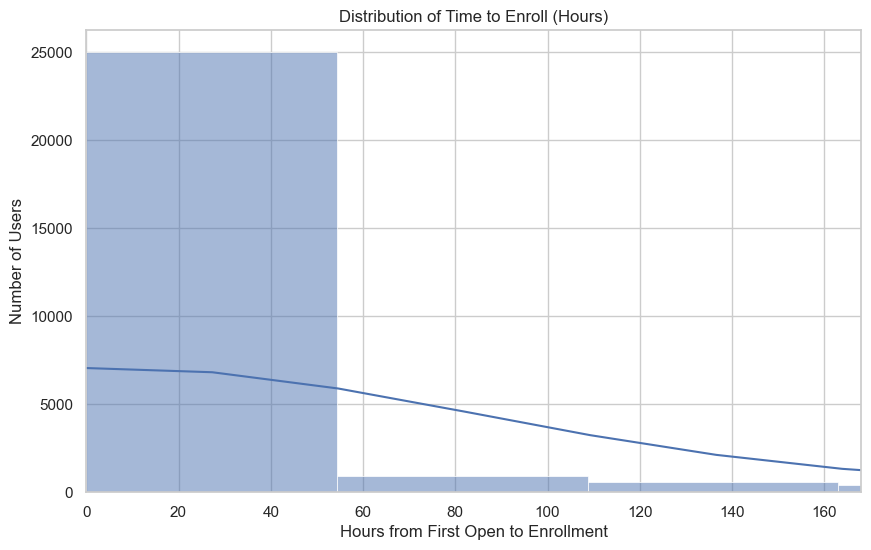

In [19]:
df["first_open"] = pd.to_datetime(df["first_open"])
df["enrolled_date"] = pd.to_datetime(df["enrolled_date"], errors="coerce")

df["time_to_enrolled"] = (
    df["enrolled_date"] - df["first_open"]
).dt.total_seconds() / 3600

enrolled_only = df[df["enrolled"] == 1].dropna(subset=["time_to_enrolled"])

plt.figure(figsize=(10, 6))
sns.histplot(enrolled_only["time_to_enrolled"], bins=100, kde=True)
plt.title("Distribution of Time to Enroll (Hours)")
plt.xlabel("Hours from First Open to Enrollment")
plt.ylabel("Number of Users")
plt.xlim(0, 168)
plt.show()

## 16. Top screens reference

This file is used later during feature engineering to map the most common screens.


In [20]:
top_screens = pd.read_csv(TOP_SCREENS_PATH)
print("Top screens rows:", len(top_screens))
top_screens.head()

Top screens rows: 58


,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
